# Título del Proyecto: Ciencia de Datos aplicada en la Industria Retail

## Breve descripción del proyecto (descripción del dataset, problemas interesantes asociados)
Se provee de un dataset que contiene datos históricos de ventas correspondientes a 45 tiendas anónimas localizadas en diferentes departamentos. Además el dataset cuenta con información de contexto (temperatura, precio del combustible, tasa de desempleo, información de rebajas, feriados) para las fechas correspondientes a las ventas (ventas registradas semanalmente desde febrero de 2010 hasta noviembre de 2012). Se provee también de una caracterización por tipo y tamaño para cada tienda y una lista de los usuarios que frecuentan cada una.
Uno de los desafíos de modelar datos de esta industria se presenta debido a la necesidad de tomar decisiones basadas en operaciones históricas limitadas. Se busca la definición de estrategias y toma de decisiones, en base al análisis y procesamiento de los datos históricos disponibles, para el cumplimiento de un cierto objetivo, como lo puede ser aumento de la rentabilidad del negocio/mejora del servicio prestado al cliente.
El objetivo de este proyecto es que el estudiante a lo largo de las materias a cursar en la diplomatura identifique y aplique diferentes técnicas de análisis/procesamiento de los datos que generen información valiosa para un negocio que se desarrolla en la industria en cuestión. Algunos de los puntos interesantes asociados son:
- Predicción de ventas futuras (detección de altas y bajas), análisis de estacionalidad de los datos.
- Segmentación de las ventas en base a las características de su contexto.
- Sistema de recomendación de tiendas para los usuarios.
- Análisis del efecto de las rebajas en las ventas para las distintas tiendas.
- Análisis del impacto de los feriados en las ventas.
- Análisis de correlación entre las diferentes variables provistas y las ventas semanales, análisis del impacto que las mismas causan.



## Contenido del Dataset
Se provee de datos históricos de ventas de 45 tiendas localizadas en diferentes regiones, cada tienda contiene un número determinado de departamentos. Cada compañía además organiza eventos de rebajas a lo largo del año. Estas rebajas preceden a feriados destacados como lo son: el Super Bowl, el Día del Trabajo, Día de Acción de Gracias y Navidad. Las semanas que incluyen estos feriados tienen un peso 5 veces mayor que las que no.

El contenido de los cuatro archivos (Stores, Users, Features y Sales) se presenta a continuación:

### Stores
Información anónima de las 45 tiendas, incluye tipo y tamaño de las mismas.

### Users
Lista de usuarios y las tiendas que frecuentan.

### Features
Contiene información adicional relacionada a las tiendas, la localidad y actividad regional para las fechas dadas.
- Store: el número de tienda.
- Date: la semana correspondiente.
- Temperatura: temperatura promedio de la región.
- Fuel Price: costo del combustible en la región.
- Markdown 1-5: datos anónimos relacionados a rebajas promocionales. Esta información esta sólo disponible a partir de Noviembre del 2011 y no esta disponible para todas las tiendas todo el tiempo. Lo valores faltantes están marcados como NA.
- CPI: índice de precios al consumidor.
- Unemployment: tasa de desempleo.
- IsHoliday: si la semana contiene al menos un día feriado.

### Sales
Datos historicos de ventas, cubren desde el 05-02-2010 hasta el 01-11-2012. Incluye los siguientes campos:
- Store: el número de tienda.
- Dept: el número de departamento.
- Date: la fecha correspondiente a la transacción.
- Weekly_Sales: ventas para el departamento dado en la tienda correspondiente.
- IsHoliday: indica si corresponde a una semana con días feriados o no.

Link a la fuente: https://www.kaggle.com/manjeetsingh/retaildataset#Features%20data%20set.csv

## Lectura y breve introducción al manejo del Dataset
Nótese que por simplicidad se mostrarán siempre 10 ejemplos de cada tabla usando comandos como head o sample.

Primero importamos la librería pandas, a través de la cual realizaremos la carga de los datos en DataFrames

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

Cargamos los archivos contenedores del dataset en cuatro DataFrames distintos

In [2]:
CURRENT_DIR = os.path.dirname('__file__')
DATASET_PATH = os.path.join(CURRENT_DIR, '../datasets')
features = pd.read_csv(os.path.join(DATASET_PATH, 'features.csv'))
sales = pd.read_csv(os.path.join(DATASET_PATH, 'sales.csv'))
stores = pd.read_csv(os.path.join(DATASET_PATH, 'stores.csv'))
users = pd.read_csv(os.path.join(DATASET_PATH, 'users.csv'))

Visualizamos los diez primeros valores de cada DataFrame

In [3]:
features.head(10)

,Unnamed: 0,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,8,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,9,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [4]:
sales.head(10)

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Sale Id
0,0,1,1,05/02/2010,24924.50,False,0
1,1,1,1,12/02/2010,46039.49,True,1
2,2,1,1,19/02/2010,41595.55,False,2
3,3,1,1,26/02/2010,19403.54,False,3
4,4,1,1,05/03/2010,21827.90,False,4
5,5,1,1,12/03/2010,21043.39,False,5
6,6,1,1,19/03/2010,22136.64,False,6
7,7,1,1,26/03/2010,26229.21,False,7
8,8,1,1,02/04/2010,57258.43,False,8
9,9,1,1,09/04/2010,42960.91,False,9


In [5]:
stores.head(10)

,Unnamed: 0,Store,Type,Size
0,0,1,A,151315.0
1,1,2,A,202307.0
2,2,3,B,37392.0
3,3,4,A,NaN
4,4,5,B,34875.0
5,5,6,A,202505.0
6,6,7,B,70713.0
7,7,8,A,155078.0
8,8,9,B,125833.0
9,9,10,B,126512.0


In [6]:
users.head(10)

,Unnamed: 0,users,stores
0,0,Sara Arriaga,16-32-7-44
1,1,Tomas Citelli,20-37-10-11
2,2,Sebastian Araujo,34-14-18-16-29
3,3,Horacio Villareal,22-14-39-25
4,4,Juan Mira,31-7-27-21-13
5,5,Gustavo Mora,45-7-19-18
6,6,Carlos Citelli,43-24-33-5-13
7,7,Franco Mira,44-12-20-8-45
8,8,Fede Villareal,19-45-32
9,9,Noelia Villareal,5-37-6-18-9


En caso de querer ver las columnas que contiene un DataFrame se puede hacer:

In [7]:
sales.columns.values

array(['Unnamed: 0', 'Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday',
       'Sale Id'], dtype=object)

En caso de querer cambiar el nombre de una columna:

In [8]:
sales.rename(columns={'Sale Id':'Sale_Id'}, inplace=True)
sales.head(10)

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Sale_Id
0,0,1,1,05/02/2010,24924.50,False,0
1,1,1,1,12/02/2010,46039.49,True,1
2,2,1,1,19/02/2010,41595.55,False,2
3,3,1,1,26/02/2010,19403.54,False,3
4,4,1,1,05/03/2010,21827.90,False,4
5,5,1,1,12/03/2010,21043.39,False,5
6,6,1,1,19/03/2010,22136.64,False,6
7,7,1,1,26/03/2010,26229.21,False,7
8,8,1,1,02/04/2010,57258.43,False,8
9,9,1,1,09/04/2010,42960.91,False,9


Si quisieramos ver el tipo de datos:

In [9]:
sales.dtypes

Unnamed: 0        int64
Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday        object
Sale_Id           int64
dtype: object

Para ver un resumen de nuestro DataFrame simplemente:

In [10]:
sales.describe()

,Unnamed: 0,Store,Dept,Weekly_Sales,Sale_Id
count,425796.000000,425796.000000,425796.000000,425796.000000,425796.000000
mean,212897.500000,22.200035,44.260944,15980.254676,210779.929558
std,122916.861947,12.785342,30.494688,22711.970177,121698.163454
min,0.000000,1.000000,1.000000,-4988.940000,0.000000
25%,106448.750000,11.000000,18.000000,2080.495000,105381.750000
50%,212897.500000,22.000000,37.000000,7610.830000,210804.500000
75%,319346.250000,33.000000,74.000000,20204.122500,316161.250000
max,425795.000000,45.000000,99.000000,693099.360000,421569.000000


Ademas se pueden aplicar diversas operaciones sobre columnas, como por ejemplo el cálculo del promedio y la varianza:

In [11]:
print(sales['Weekly_Sales'].mean())
print(sales['Weekly_Sales'].var())

15980.254675877844
515833589.33176196


Una librería muy útil para el cálculo de estadísticos y diferentes operaciones matemáticas es la librería numpy, a continuación se realiza el cálculo del promedio a modo de ejemplo:

In [12]:
import numpy as np

sales_array = np.array(sales['Weekly_Sales'])
sales_array.mean()

15980.254675877648

Por defecto no podremos ver todas las columnas y filas de los DataFrames en caso que sean muy extensos. Para poder hacerlo deberemos setear los siguientes parametros de pandas:

In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Cómo se puede observar en todas las tablas tenemos una columna Unnamed: 0 que no nos aporta información. Podemos borrar columnas de un DataFrame de la siguiente manera:

In [14]:
sales = sales.drop('Unnamed: 0', axis=1)
sales.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Sale_Id
0,1,1,05/02/2010,24924.50,False,0
1,1,1,12/02/2010,46039.49,True,1
2,1,1,19/02/2010,41595.55,False,2
3,1,1,26/02/2010,19403.54,False,3
4,1,1,05/03/2010,21827.90,False,4
5,1,1,12/03/2010,21043.39,False,5
6,1,1,19/03/2010,22136.64,False,6
7,1,1,26/03/2010,26229.21,False,7
8,1,1,02/04/2010,57258.43,False,8
9,1,1,09/04/2010,42960.91,False,9


Para visualizar filas podremos hacerlo de la siguiente manera:

In [15]:
sales['Weekly_Sales'].head(10)

0    24924.50
1    46039.49
2    41595.55
3    19403.54
4    21827.90
5    21043.39
6    22136.64
7    26229.21
8    57258.43
9    42960.91
Name: Weekly_Sales, dtype: float64

O simplemente (en este caso al usar sample en lugar de head estamos mostrando 10 elementos random del dataset):

In [16]:
sales.Date.sample(10)

8254      20/08/2010
144657    28/10/2011
65605     26/11/2010
207588    20/08/2010
116444    10/02/2012
117245    30/09/2011
128502    14/09/2012
168817    25/03/2011
183218    11/05/2012
309695    25/06/2010
Name: Date, dtype: object

Si quisieramos quedarnos con todas las filas correspondientes a los días feriados podríamos hacerlo de la siguiente manera:

In [17]:
sales[sales['IsHoliday']==True].head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Sale_Id
1,1,1,12/02/2010,46039.49,True,1
31,1,1,10/09/2010,18194.74,True,31
42,1,1,26/11/2010,18820.29,True,42
47,1,1,31/12/2010,19124.58,True,47
83,1,1,09/09/2011,17746.68,True,83
94,1,1,25/11/2011,20911.25,True,94
99,1,1,30/12/2011,23350.88,True,99
105,1,1,10/02/2012,36988.49,True,105
135,1,1,07/09/2012,18322.37,True,135
144,1,2,12/02/2010,44682.74,True,144


Si se quiere recorrer todas las filas de un DataFrame podrá utilizarse el comando iterrows, que devolverá la información para cada fila de la siguiente manera:
(0, Store                    1
Dept                     1
Date            05/02/2010
Weekly_Sales       24924.5
IsHoliday            False
Sale Id                  0
Name: 0, dtype: object)

Y nos permitirá acceder a los datos a través del número de la columna correspondiente, en este caso imprimiremos todas las ventas correspondientes a la Store 1 en el departamento 1 en días feriados:

In [18]:
for row in sales.iterrows():
    if row[1][0] == 1 and row[1][1] == 1 and row[1][4]==True:
        print(row[1][3])

46039.49
18194.74
18820.29
19124.58
17746.68
20911.25
23350.88
36988.49
18322.37
17746.68


Muchas veces en nuestros Datasets tenemos datos vacíos (NaN), los cuales pueden ser molestos para nuestros análisis. En un análisis profundo se debe analizar cada caso y completar los valores vacíos según ciertos criterios. Por ejemplo una fila de edad vacía podría completarse con el promedio del resto de las edades. En caso de un análisis rápido podrían simplemente eliminarse las filas (o columnas) que contienen valores NaN de la siguiente manera:

In [19]:
features.dropna(axis=0, how='any').head(10)

,Unnamed: 0,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
92,92,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
93,93,1,18/11/2011,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
94,94,1,25/11/2011,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
95,95,1,02/12/2011,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,96,1,09/12/2011,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False
97,97,1,16/12/2011,51.63,3.159,5011.32,67.00,347.37,225.79,4011.37,219.179453,7.866,False
98,98,1,23/12/2011,47.96,3.112,2725.36,40.48,634.70,24.90,2739.43,219.357722,7.866,False
99,99,1,30/12/2011,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,219.535990,7.866,True
100,100,1,06/01/2012,49.01,3.157,6277.39,21813.16,143.10,1450.13,8483.00,219.714258,7.348,False
101,101,1,13/01/2012,48.53,3.261,5183.29,8025.87,42.24,453.08,3719.38,219.892526,7.348,False


Cuando queramos aplicar una funcion a la totalidad de elementos de una columna podremos hacerlo de la siguiente manera (en este caso reemplazaremos los valores nan de la columna ventas por el promedio):

In [20]:
def replace_nan(val):
    if str(val)=='NaN':
        print('Nan founded')

Veámos ahora la distribución de los valores de las clases de una columna en particular:

In [21]:
sales.IsHoliday.value_counts()

False    356626
True      27052
Name: IsHoliday, dtype: int64

Y lo comparamos con el tamaño del dataframe:

In [22]:
sales.shape

(425796, 6)

Cómo se puede observar no coincide la suma de ambas clases con el número total de filas, probablemente tengamos valores nulos, los cuales los podemos reemplazar con el valor más frecuente de esta columna:

In [23]:
sales.IsHoliday.value_counts().idxmax()

False

In [24]:
def replace_nan(val):
    if str(val)=='nan':
        return sales.IsHoliday.value_counts().idxmax()
    else:
        return val

In [25]:
sales.IsHoliday.head(10).apply(replace_nan)

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: IsHoliday, dtype: bool

## Consigna práctico Análisis y Visualización

1 Calcular estadísticos como la moda, media, mediana y desviación estándar del precio del combustible y la temperatura. ¿Responden a alguna distribución conocida?

2 Seleccionar una tienda cualquiera, y calcular el promedio de ventas mensuales para los años en cuestión, graficar la distribución de las ventas promedios mensuales para cada año. ¿Responde a alguna distribución conocida?

3 Realizar un análisis de outliers para 3 variables a elección.

4 ¿Qué pasaría con las ventas si se baja el combustible?¿Que pasaría con las ventas si aumenta la tasa de desempleo?¿Qué sucede con las ventas si nos encontramos en un día feriado? En el caso de las ventas mensuales promedios, ¿existe una relación entre la variable ventas y el mes del año en que nos encontramos?

5 Crear una columna adicional IsMarkdown la cual será True si ha habido una rebaja en esa fecha y será False si no la ha habido. Teniendo en cuenta las variables IsHolisday e IsMarkdown, calcular su probabilidades conjunta y marginal.

6 ¿Que probabilidad hay de que haya rebajas una semana que se sabe que es feriado? Dividir en 4 partes el dataset y calcular bayes con respecto a estas dos variables, usando los resultados de cada iteración / partición para calcular. El objetivo es simular que los datos que van llegando en cada iteración recalculan la probabilidad

Para la entrega se pide un jupyter notebook que contenga el desarrollo y los cálculos que han sido necesario para responder las preguntas. Además el alumno deberá presentar las respuestas acompañadas de gráficos en un formato interactivo para el lector, como lo puede ser a través de un html.

# Estadisticos de Temperature y Fuel Price

In [26]:
print(features[['Temperature','Fuel_Price']].agg(['mean', 'median', 'std'])) #falta la moda
print('Moda Fuel_Price  \n' + str(features['Fuel_Price'].mode()))
print('\n')
print('Moda Temperature  \n' + str(features['Temperature'].mode()))

        Temperature  Fuel_Price
mean      59.356198    3.405992
median    60.710000    3.513000
std       18.678607    0.431337
Moda Fuel_Price  
0    3.417
1    3.638
dtype: float64


Moda Temperature  
0    50.43
1    70.28
dtype: float64


## Descripcion de Temperature y Fuel Price del dataset

In [27]:
features[['Temperature','Fuel_Price']].describe()

,Temperature,Fuel_Price
count,8190.000000,8190.000000
mean,59.356198,3.405992
std,18.678607,0.431337
min,-7.290000,2.472000
25%,45.902500,3.041000
50%,60.710000,3.513000
75%,73.880000,3.743000
max,101.950000,4.468000


In [28]:
import seaborn
import matplotlib.pyplot as plt
from scipy import stats

## Histograma de temperatura

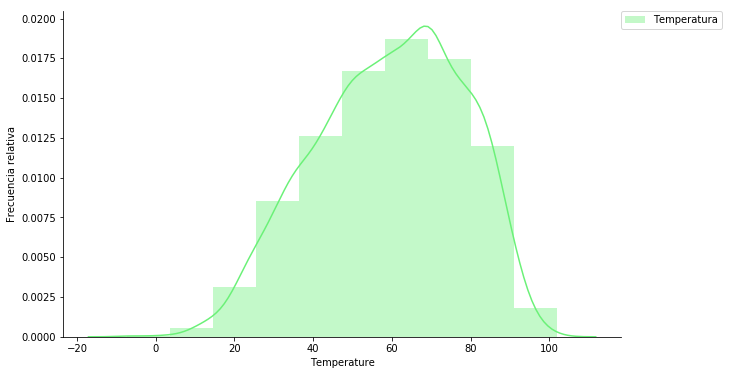

In [29]:
plt.figure(figsize=(10,6))
seaborn.distplot(features['Temperature'].dropna(), bins=10, color='#6BF178', label='Temperatura')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.ylabel('Frecuencia relativa')
seaborn.despine()

Analisis de variables: 
Temperatura: de acuerdo al rango de la variable temperatura se observa una gran amplitud térmica en la totalidad de las tiendas, lo cual puede deberse a la distribucion geografica de las tiendas, es decir que se encuentren muy alejadas entre sí abarcando regiones de distintos climas o bien que las regiones donde se ubican se caractericen por tal amplitud termica. De acuerdo al histograma y analisis de cuartiles, el 50% de los registros de temperatura se encuentra entre 45,9 y 73,8 grados Fahrenheit (que equivale a 7.7º y 23º celcius) por ende las temperaturas mas extremas han tenido bajas frecuencias.El grafico no pareciera corresponder al de una distribución normal.


## Histograma de Fuel Price 

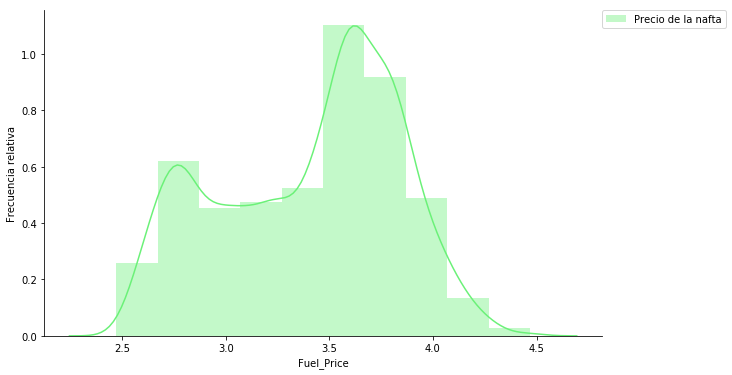

In [30]:
plt.figure(figsize=(10,6))
seaborn.distplot(features['Fuel_Price'].dropna(), bins=10, color='#6BF178', label='Precio de la nafta')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.ylabel('Frecuencia relativa')
seaborn.despine()

Analisis de variables: 
Precio de la nafta: de acuerdo al rango de la variable el precio de la nafta en toda la serie se ha movido entre valores de 2,47 usd y 4,46 usd. Esta variable no presenta un histograma que tenga la forma de distribucion normal y en este caso el 50% de los registros de  se encuentra entre 3 y 3,74 dólares lo cual corresponde a un intervalo de precio bastante acotado. 


In [31]:
def get_normalized_variable(dataset, variable):
    """
    This method will be used to normalize a variable within a defined dataset
    """
    mean, std = stats.norm.fit(dataset[variable].dropna())
    return (dataset[variable].dropna() - mean) / std

## Resultado del ks test de Temperature

In [32]:
# Calculamos ks test de temperatura
print('KS Test de temperatura:')
stats.kstest(get_normalized_variable(features, 'Temperature'), 'norm')

KS Test de temperatura:


KstestResult(statistic=0.046475733172642975, pvalue=8.617634709858575e-16)

## Resultado del ks test de Fuel price

In [33]:
# Calculamos ks test de Fuel price
print('KS Test de Fuel Price:')
stats.kstest(get_normalized_variable(features, 'Fuel_Price'), 'norm')

KS Test de Fuel Price:


KstestResult(statistic=0.10373963883604109, pvalue=5.540417587753549e-77)

Tal como lo intuíamos en los graficos de histogramas, luego de haber aplicado los test de normalidad con los p-valores obtenidos no podemos afirmar que se corresponda a una distribución normal en ningún caso.

## Promedio de ventas mensual de la Store nro 2

In [34]:
# 2. Seleccionar una tienda cualquiera, y calcular el promedio de ventas mensuales para los años en cuestión, graficar la distribución de las ventas promedios mensuales para cada año. ¿Responde a alguna distribución conocida?

In [35]:
sales['Date'] =pd.to_datetime(sales.Date) 

In [36]:
# sales.index = sales['Date'] 
# sales[sales['Store'] == 2].resample('M')[['Weekly_Sales','Store']].mean()

In [37]:
# sales[sales['Store'] == 2].resample('M')[['Weekly_Sales','Store']].mean()

In [38]:
prueba=sales[sales['Store']==2][['Weekly_Sales','Date']]


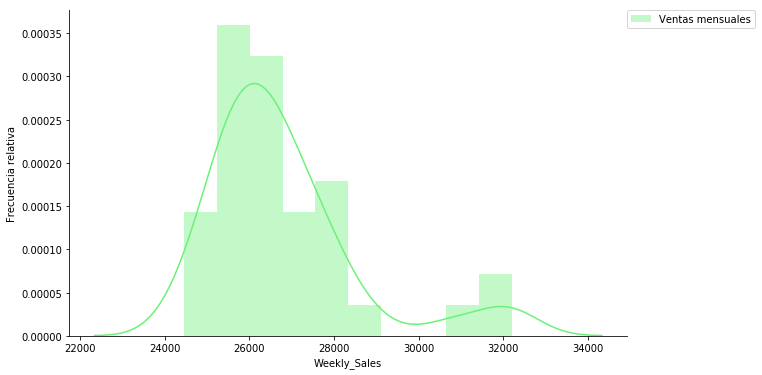

In [39]:
prueba2=prueba.groupby([prueba['Date'].dt.month,prueba['Date'].dt.year]).agg('mean')
plt.figure(figsize=(10,6))
seaborn.distplot(prueba2['Weekly_Sales'], bins=10, color='#6BF178', label='Ventas mensuales')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.ylabel('Frecuencia relativa')
seaborn.despine()


De acuerdo al grafico anterior, la distribucion de las ventas mensuales de la tienda número dos no pareciera distribuirse de forma normal. El monto promedio mensual de venta que se presenta con mayor frecuencia es de alrededor de 26.000 dolares.

# Analisis de Outliers 

## Temperature

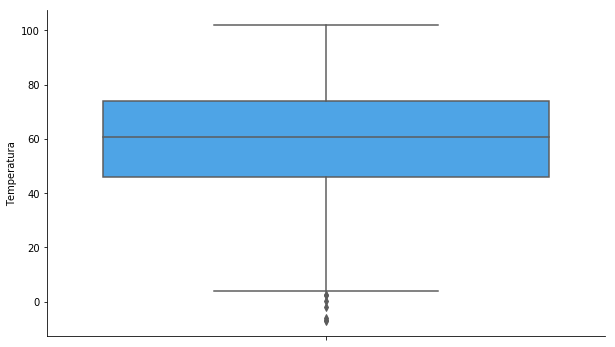

In [40]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=features,
              y='Temperature', 
             color='#35A7FF' )
plt.ylabel('Temperatura')
plt.xticks(rotation=45)
seaborn.despine()

Analisis outliers temperatura:
Esta variable presenta outlier para los valores inferiores. Pueden ser dos cosas o que hubo algun fenomeno climatico muy distinto a lo normal o que las tiendas tienen una distribucion geografica con climas muy diferentes los outliers corresponden a temperaturas muy bajas

## Fuel Price

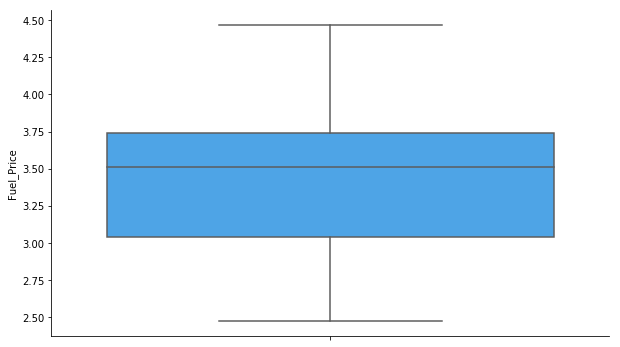

In [41]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=features,
              y='Fuel_Price', 
             color='#35A7FF' )
plt.ylabel('Fuel_Price')
plt.xticks(rotation=45)
seaborn.despine()

Analisis outliers Fuel_price: El precio del petroleo se mueve dentro de un rango acotado y no presenta valores atipicos

## Unemployment

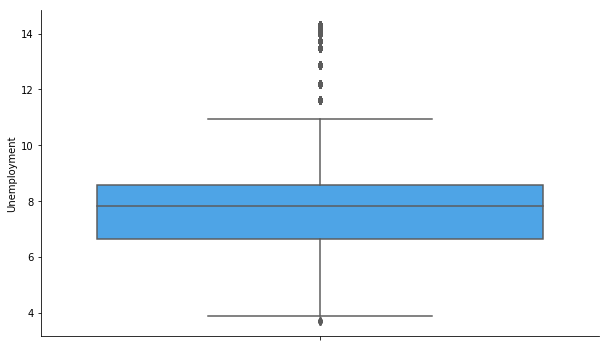

In [42]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=features,
              y='Unemployment', 
             color='#35A7FF' )
plt.ylabel('Unemployment')
plt.xticks(rotation=45)
seaborn.despine()

Analisis outliers Unemployment: Hay muchos valores atipicos de tasas de desempleo altas y muy pocos de bajas tasas de desempleo, lo cual insinúa que el periodo bajo estudio pudo haber estado afectado por alguna crisis económica con tasas de desempleo mas altas de lo habitual.

In [43]:
# features[features['Unemployment']>10].head(10)

In [44]:
# 4 ¿Qué pasaría con las ventas si se baja el combustible?
# ¿Que pasaría con las ventas si aumenta la tasa de desempleo?
# ¿Qué sucede con las ventas si nos encontramos en un día feriado?
# En el caso de las ventas mensuales promedios, ¿existe una relación entre la variable ventas y el 
# mes del año en que nos encontramos?

# Correlaciones

In [45]:
#vemos que la cantidad de filas de ventas son 425796 
print('Las dimensiones del dataframe de sales en (filas,columnas) son: ' +str(sales.shape)) 
print('En donde las filas representan la cantidad de ventas realizadas correspondientes a '+str(len(sales.Date.unique()))+' semanas')
print('\n')
print('Las dimensiones del dataframe de features en (filas,columnas)  son: ' +str(features.shape)) 
print('En donde las filas representan las caracteristicas y valores que toman las ventas correspondientes a las '+str(len(features.Date.unique()))+' semanas cargadas')

Las dimensiones del dataframe de sales en (filas,columnas) son: (425796, 6)
En donde las filas representan la cantidad de ventas realizadas correspondientes a 143 semanas


Las dimensiones del dataframe de features en (filas,columnas)  son: (8190, 13)
En donde las filas representan las caracteristicas y valores que toman las ventas correspondientes a las 182 semanas cargadas


In [46]:
# features.head(8)

## Analisis de Correlación entre Fuel Price y Weekly Sales

In [47]:
features['Date'] = pd.to_datetime(features.Date)
features.index = features['Date']

Tabla de correlacion por el metodo spearman agrupado por fecha

In [48]:
# #Forma 1
# sales.Weekly_Sales.groupby(sales.Date).sum().corr(features.Fuel_Price.groupby(features.Date).sum(), method='spearman')

In [49]:
#Forma 2
pd.concat([sales.Weekly_Sales.groupby(sales.Date).sum(),
           features.Fuel_Price.groupby(features.Date).sum()], axis=1).corr(method='spearman')

,Weekly_Sales,Fuel_Price
Weekly_Sales,1.00000,-0.00014
Fuel_Price,-0.00014,1.00000


In [50]:
# #Forma 3
# pd.concat([sales.Weekly_Sales.groupby(sales.Date).sum(), 
#            features.Fuel_Price.groupby(features.Date).sum()], axis=1).dropna().corr(method='spearman') 

Dado los valores obtenidos concluimos que no hay correlacion entre las variables venta semanal y precio del combustible. Por lo tanto si baja el precio del combustible las ventas no deberian variar por esa causa.

## Analisis de Correlación entre Unemployment y Weekly Sales

valor de correlacion por el metodo spearman agrupado por fecha

In [51]:
# Correlación entre Unemployment y Weekly_Sales
sales.Weekly_Sales.groupby(sales.Date).sum().corr(features.Unemployment.groupby(features.Date).sum(), method='spearman')

-0.06514342503681281

Dado el valor obtenido obtenidos concluimos que no hay correlacion entre las variables. Por lo tanto si aumenta la tasa de dsempleo no deberian variar las ventas por dicha causa.

## Analisis de Correlación entre  Weekly Sales y IsHoliday

Estadisticos de ventas para dias feriados

In [52]:
# Weekly Sales y feriados
sales[sales['IsHoliday']==True].Weekly_Sales.describe()

count     27052.000000
mean      17052.301628
std       27268.826617
min        -798.000000
25%        2086.737500
50%        7946.410000
75%       21185.080000
max      693099.360000
Name: Weekly_Sales, dtype: float64

Estadisticos de ventas para dias no feriados

In [53]:
# Weekly Sales en días no feriados
sales[sales['IsHoliday']==False].Weekly_Sales.describe()

count    356626.000000
mean      15889.173611
std       22294.743080
min       -3924.000000
25%        2079.367500
50%        7583.195000
75%       20129.195000
max      406988.630000
Name: Weekly_Sales, dtype: float64

La media de las ventas fue mas alta las semanas que hubo feriados por lo que asumimos que hay algun tipo de correlacion positiva. Esto significa que si nos encontramos en un día feriado las ventas serían mayores.

## Analisis de Correlación entre  Weekly Sales y month of year

Grafico de promedio de ventas en cada mes de la Store2

<Figure size 64800x720 with 0 Axes>

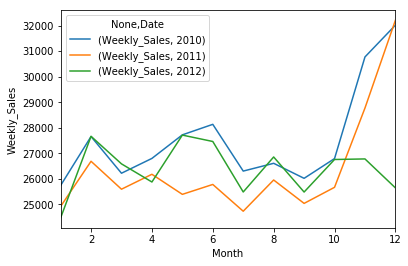

<Figure size 64800x720 with 0 Axes>

In [54]:
prueba.groupby([prueba['Date'].dt.month,prueba['Date'].dt.year]).agg('mean').unstack().plot.line()
plt.ylabel('Weekly_Sales')
plt.xlabel('Month')
plt.figure(figsize=(900,10))

En general se observa una relacion entre las ventas y el mes del año pero no pareciera ser muy fuerte. Por ejemplo en enero se ve que en general las ventas son mas bajas y en noviembre diciembre generalmente suben. Con mas cantidad de años se podria realizar un analisis mas profundo de esto

# Probabilidades conjuntas entre Ismarkdown and is holiday

In [55]:
def fc_desc(val):
    a=str(val)
    if a.isnull():
        return 0
    return val

In [56]:
def fc_repl(val):
    if val==0:
        return False
    return True

In [57]:
#Reemplazamos los valores nulos por 0
prueba4 = features.copy()
prueba4.MarkDown1.fillna(0, inplace=True)
prueba4.MarkDown2.fillna(0, inplace=True)
prueba4.MarkDown3.fillna(0, inplace=True)
prueba4.MarkDown4.fillna(0, inplace=True)
prueba4.MarkDown5.fillna(0, inplace=True)




In [58]:
tk = (prueba4['MarkDown1']+prueba4['MarkDown2']+prueba4['MarkDown3']+prueba4['MarkDown4']+prueba4['MarkDown5'])

prueba4=prueba4.assign(IsMarkdown=tk.values)


prueba4['IsMarkdown']= prueba4['IsMarkdown'].apply(fc_repl)

# prueba4.head(1)

In [59]:
#me creo un dataset con las variables q voy a usar
prueba5 =prueba4[['IsHoliday','IsMarkdown']]

In [60]:
#Estas crosstab hago 4 una por cada muestra con la funcion abajo
# pd.crosstab(index=muestra1['IsHoliday'], columns=muestra1['IsMarkdown'],margins = True,normalize = True)
pd.crosstab(index=prueba5['IsHoliday'], columns=prueba5['IsMarkdown'],margins = True)

IsMarkdown,False,True,All
IsHoliday,,,
False,3870,3735,7605
True,270,315,585
All,4140,4050,8190


In [61]:
markdown_holiday_prob = pd.crosstab(index=prueba5['IsHoliday'], columns=prueba5['IsMarkdown'],margins = True,normalize = True)
markdown_holiday_prob

IsMarkdown,False,True,All
IsHoliday,,,
False,0.472527,0.456044,0.928571
True,0.032967,0.038462,0.071429
All,0.505495,0.494505,1.000000


In [62]:
print('Probabilidades conjuntas:')
print(f'Probabilidad de que no haya descuento dado que no es feriado: {markdown_holiday_prob[0][0]}')
print(f'Probabilidad de que haya descuento dado que no es feriado: {markdown_holiday_prob[1][0]}')
print(f'Probabilidad de que no haya descuento dado que es feriado: {markdown_holiday_prob[0][1]}')
print(f'Probabilidad de que haya descuento dado que es feriado: {markdown_holiday_prob[1][1]}')


Probabilidades conjuntas:
Probabilidad de que no haya descuento dado que no es feriado: 0.4725274725274725
Probabilidad de que haya descuento dado que no es feriado: 0.45604395604395603
Probabilidad de que no haya descuento dado que es feriado: 0.03296703296703297
Probabilidad de que haya descuento dado que es feriado: 0.038461538461538464


In [63]:
print('Probabilidades marginales:')
print(f'Probabilidad de que no haya descuento: {markdown_holiday_prob[0]["All"]}')
print(f'Probabilidad de que haya descuento: {markdown_holiday_prob[1]["All"]}')
print(f'Probabilidad de que no sea feriado: {markdown_holiday_prob["All"][0]}')
print(f'Probabilidad de que sea feriado: {markdown_holiday_prob["All"][1]}')

Probabilidades marginales:
Probabilidad de que no haya descuento: 0.5054945054945055
Probabilidad de que haya descuento: 0.4945054945054945
Probabilidad de que no sea feriado: 0.9285714285714286
Probabilidad de que sea feriado: 0.07142857142857142


# BAYES

In [64]:
def bayes(ab,ac):
    if ac is None:
        PA = ab['IsMarkdown'!=True][2]/ab['All'][2]#Probabilidad de que haya descuento
        PB = ab['All'][1]/ab['All'][2]#Probabilidad de que sea holiday
        PBA= ab['IsMarkdown'!=True][1]/ab['IsMarkdown'!=True][2]
        PAB=(float(PA)*float(PBA))/float(PB) #P(A/B) = P(Ai).P(B/Ai) /P(B)
    else: 
        PA = ac #Probabilidad de que haya descuento
        PB = ab['All'][1]/ab['All'][2]#Probabilidad de que sea holiday
        PBA= ab['IsMarkdown'!=True][1]/ab['IsMarkdown'!=True][2]
        PAB=(float(PA)*float(PBA))/float(PB) #P(A/B) = P(Ai).P(B/Ai) /P(B)
    return PAB


In [65]:
def crosstab(name):
    ax=pd.crosstab(index=name['IsHoliday'], columns=name['IsMarkdown'],margins = True)
    return ax

Primero separamos el dataset en 4 grupos

In [66]:
#parto el dataset en 4
muestra1 = prueba5[:2047]
muestra2 = prueba5[2047:4094]
muestra3 = prueba5[4094:6141]
muestra4 = prueba5[6141:]

In [67]:
ab = crosstab(muestra1)
ac = None
print('Analizamos la primera muestra:')
print()
print(ab)
print()
ac = bayes(ab, ac)
print(f'Probabilidad que haya descuento dado que es feriado es: {ac}')

Analizamos la primera muestra:

IsMarkdown  False  True   All
IsHoliday                    
False         988   913  1901
True           69    77   146
All          1057   990  2047

Probabilidad que haya descuento dado que es feriado es: 0.5273972602739726


In [68]:
print('Analizamos la segunda muestra:')
ab = crosstab(muestra2)
ac = bayes(ab, ac)
print()
print(ab)
print()
print(f'Probabilidad que haya descuento dado que es feriado en la 2da iteración: {ac}')

Analizamos la segunda muestra:

IsMarkdown  False  True   All
IsHoliday                    
False         988   913  1901
True           69    77   146
All          1057   990  2047

Probabilidad que haya descuento dado que es feriado en la 2da iteración: 0.5751198890765414


In [69]:
print('Analizamos la tercera muestra:')
ab = crosstab(muestra3)
ac = bayes(ab, ac)
print()
print(ab)
print()
print(f'Probabilidad que haya descuento dado que es feriado en la 3ra iteración: {ac}')

Analizamos la tercera muestra:

IsMarkdown  False  True   All
IsHoliday                    
False         948   953  1901
True           66    80   146
All          1014  1033  2047

Probabilidad que haya descuento dado que es feriado en la 3ra iteración: 0.6244720990543199


In [70]:
print('Analizamos la cuarta muestra:')
ab = crosstab(muestra4)
ac = bayes(ab, ac)
print()
print(ab)
print()
print(f'Probabilidad que haya descuento dado que es feriado en la 4ta iteración: {ac}')

Analizamos la cuarta muestra:

IsMarkdown  False  True   All
IsHoliday                    
False         946   956  1902
True           66    81   147
All          1012  1037  2049

Probabilidad que haya descuento dado que es feriado en la 4ta iteración: 0.679898253123849
